In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
original_data_file = "HackathonData2024.csv"
df = pd.read_csv(original_data_file)


Dropping all features except for three

In [3]:
df = df.loc[:, ['Avg Open Pressure', 'Pressure Gradient (psi/ft) new', 'Avg Close Pressure', 'Avg Pump Difference', 'Fluid System']]

In [4]:
df.head()

,Avg Open Pressure,Pressure Gradient (psi/ft) new,Avg Close Pressure,Avg Pump Difference,Fluid System
0,3304.124833,0.593758,2719.898438,-0.93,Campbell
1,3301.199254,0.597059,2934.885325,-8.45,Campbell
2,2774.407080,0.516873,1589.948673,8.70,Campbell
3,2653.539415,0.501287,1304.162878,NaN,Campbell
4,NaN,0.503327,NaN,19.93,Campbell


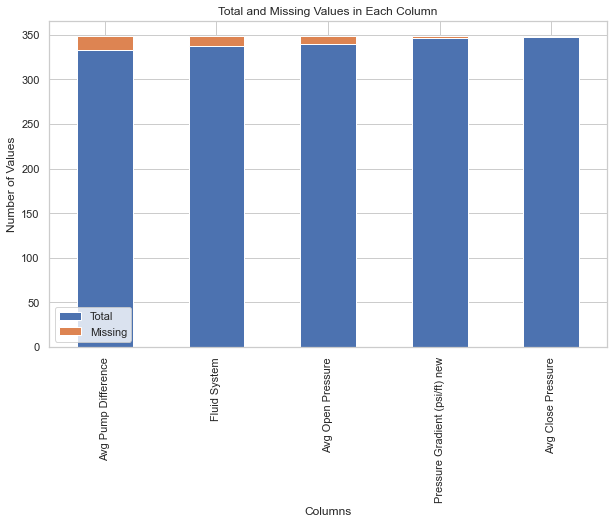

In [5]:
total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

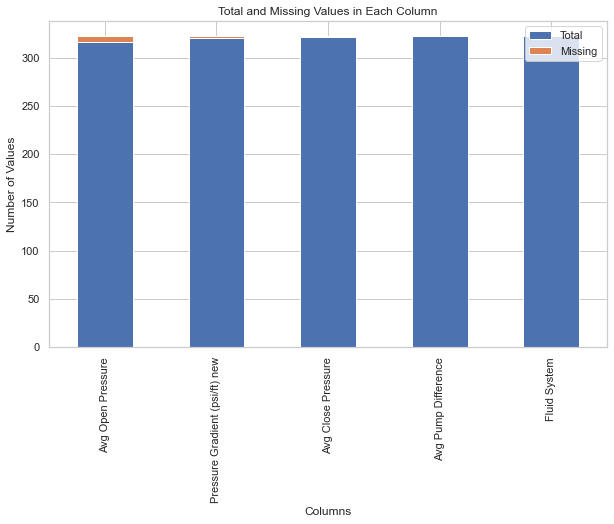

In [6]:
df = df.dropna(subset=['Avg Pump Difference', 'Fluid System'])


total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

In [7]:
imputer = IterativeImputer(max_iter=10, random_state=0)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Perform MICE imputation
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


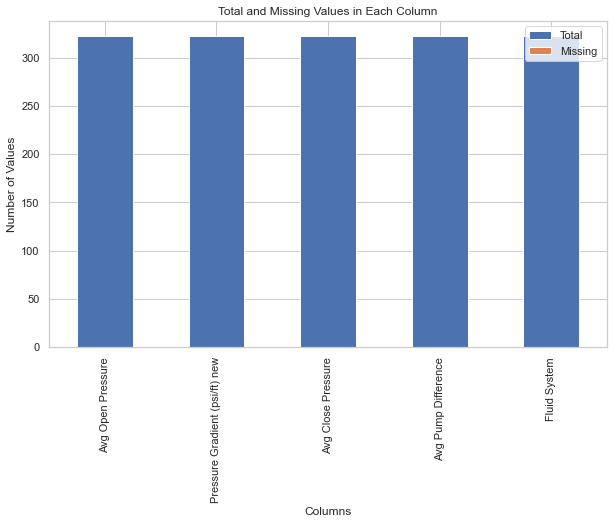

In [8]:
total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['Fluid System'])

X = df_encoded.drop('Avg Pump Difference', axis=1)  # Features (including encoded categorical variable)
y = df_encoded['Avg Pump Difference']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model Coefficients: [-1.86211601e-02 -2.18049709e+02 -3.26317967e-03 -8.63864997e+00
 -1.27860048e+01  2.14246548e+01]
Mean Squared Error: 237.22888644535075


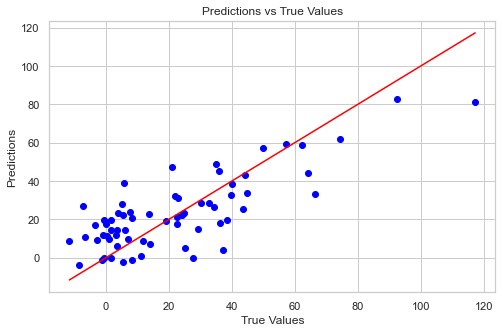

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Mean Squared Error:", mse)


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.grid(True)
plt.show()

Mean Squared Error: 210.4304673630769


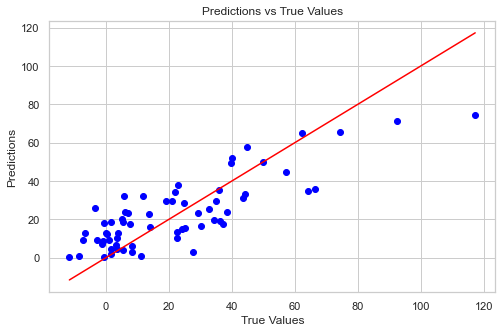

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Classifier
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.grid(True)
plt.show()